I will now create a detailed outline for the Google Colab, with all the steps of the CRISP-DM methodology clearly defined in both code and explanatory text. This Colab will handle every phase of the CRISP-DM process using a dataset that predicts property prices. The aim is to provide not only the Python code but also explanations, ensuring that the notebook flows seamlessly from the theoretical concepts to practical execution.

### 1. **Setup and Install Dependencies**
Start by installing necessary libraries.











In [1]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.9 MB/s eta 0:00:00


In [2]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import shap

In [3]:
# Display settings for Pandas DataFrames
pd.set_option('display.max_columns', None)


### 2. **Business Understanding**
This section establishes the problem we are solving: predicting house sale prices using features like area, number of rooms, and year built.

```markdown
### Business Understanding
The objective of this project is to predict the sale prices of properties using various features. This model will assist real estate stakeholders in making informed decisions regarding property prices. We'll use the Ames Housing dataset, which contains information about the characteristics of the property, like area, quality, and year built.

Key Business Questions:
1. What factors most influence the sale price of a property?
2. How accurate can we make the price predictions?

**Success Criteria**: Achieve a prediction error (Root Mean Squared Error, RMSE) of less than $30,000.
```


### 3. **Data Understanding**
Load the dataset and perform initial exploration, including summary statistics and visualizations.


In [4]:
#import files from local
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [5]:
# Load the dataset
#train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [44]:
# Check for NaN values in the original DataFrame
train_data = pd.read_csv('/content/train.csv')

# Create a mask for non-NaN values in the relevant features
non_nan_mask = train_data.drop(columns='SalePrice').notnull().all(axis=1)

# Align target variable with non-NaN mask
y_train_filtered = train_data.loc[non_nan_mask, 'SalePrice']

# Align features with the same mask
X_train_filtered = train_data.drop(columns='SalePrice').loc[non_nan_mask]

# Convert to NumPy arrays
X_train_np = X_train_filtered.to_numpy()
y_train_np = y_train_filtered.to_numpy()

# Final shape check
print(f"Filtered X_train_np shape: {X_train_np.shape}")
print(f"Filtered y_train_np shape: {y_train_np.shape}")


Filtered X_train_np shape: (0, 80)
Filtered y_train_np shape: (0,)


In [45]:
# Display the first few rows of the dataset
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
# Summary statistics
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [47]:
# Check for missing values
missing_values = train_data.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [48]:
# Check which rows have missing values in the features you dropped
rows_with_nan = train_data[train_data.isnull().any(axis=1)]
print(rows_with_nan)  # This will print rows that have any NaN values


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neig

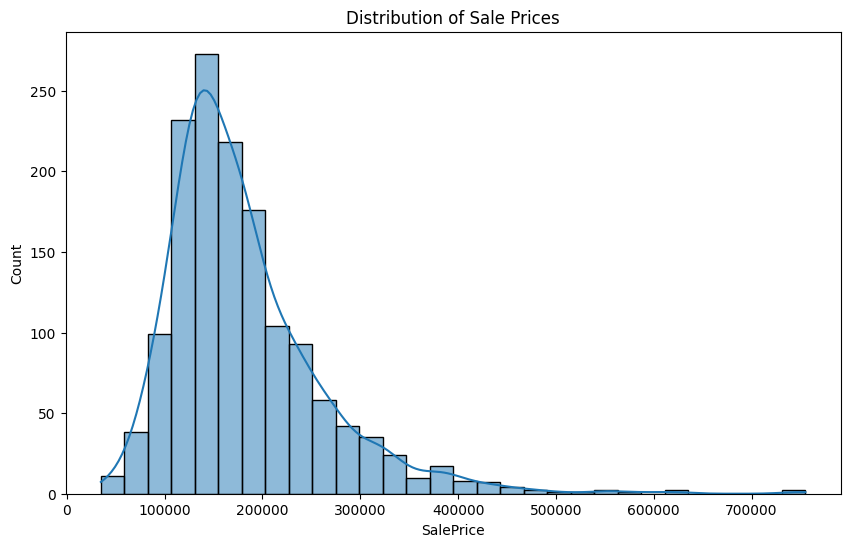

In [49]:
# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10,6))
sns.histplot(train_data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.show()

### 4. **Data Preparation**
Handle missing data, encode categorical variables, perform feature engineering, and scale numerical features.


In [50]:
# Handling missing values
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median(), inplace=True)

In [51]:
# Fill missing categorical values with 'None'
for column in ['Alley', 'PoolQC', 'Fence', 'MiscFeature']:
    train_data[column].fillna('None', inplace=True)

In [52]:
# Categorical encoding using One-Hot Encoding
categorical_cols = train_data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = pd.DataFrame(encoder.fit_transform(train_data[categorical_cols]))

In [53]:
# Scale numerical variables
scaler = StandardScaler()
numerical_cols = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']
scaled_numerical = pd.DataFrame(scaler.fit_transform(train_data[numerical_cols]))

In [54]:
# Drop original categorical columns and merge encoded and scaled data
train_data = train_data.drop(categorical_cols, axis=1)
train_data = pd.concat([train_data, encoded_categorical, scaled_numerical], axis=1)

In [55]:
# Feature engineering: Create new features such as 'Age' and 'RemodelAge'
train_data['Age'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['RemodelAge'] = train_data['YrSold'] - train_data['YearRemodAdd']

In [56]:
# Split the data into training and validation sets
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Drop rows with missing values
X_train_dropped = X_train.dropna()
X_valid_dropped = X_valid.dropna()

# Make sure to drop corresponding target values
y_train_dropped = y_train[X_train_dropped.index]
y_valid_dropped = y_valid[X_valid_dropped.index]


### 5. **Modeling**
Train various models, such as Linear Regression, Random Forest, and Gradient Boosting. Implement cross-validation and hyperparameter tuning.


In [60]:
# Ensure all column names in training set are strings
X_train_dropped.columns = X_train_dropped.columns.astype(str)

# Ensure all column names in validation set are strings
X_valid_dropped.columns = X_valid_dropped.columns.astype(str)

# Fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_dropped, y_train_dropped)

# Make predictions on the validation set
y_pred_lr = lin_reg.predict(X_valid_dropped)


In [62]:
print(f"X_train shape: {X_train_np.shape}")
print(f"y_train shape: {y_train_np.shape}")


X_train shape: (0, 80)
y_train shape: (0,)


In [63]:
# Create a mask for rows with no NaN values in the features
non_nan_mask = train_data.drop(columns='SalePrice').notnull().all(axis=1)

# Create a filtered version of the original target variable
y_train_filtered = train_data.loc[non_nan_mask, 'SalePrice']

# Now filter X_train using the same mask
X_train_filtered = train_data.drop(columns='SalePrice').loc[non_nan_mask]

# Convert to NumPy arrays if needed
X_train_np = X_train_filtered.to_numpy()
y_train_np = y_train_filtered.to_numpy()

# Check the shapes again
print(f"Filtered X_train shape: {X_train_np.shape}")
print(f"Filtered y_train shape: {y_train_np.shape}")


Filtered X_train shape: (1452, 267)
Filtered y_train shape: (1452,)


In [64]:
# Check for NaN values in the original DataFrame
train_data = pd.read_csv('/content/train.csv')

# Create a mask for non-NaN values in the relevant features
non_nan_mask = train_data.drop(columns='SalePrice').notnull().all(axis=1)

# Align target variable with non-NaN mask
y_train_filtered = train_data.loc[non_nan_mask, 'SalePrice']

# Align features with the same mask
X_train_filtered = train_data.drop(columns='SalePrice').loc[non_nan_mask]

# Convert to NumPy arrays
X_train_np = X_train_filtered.to_numpy()
y_train_np = y_train_filtered.to_numpy()

# Final shape check
print(f"Filtered X_train_np shape: {X_train_np.shape}")
print(f"Filtered y_train_np shape: {y_train_np.shape}")


Filtered X_train_np shape: (0, 80)
Filtered y_train_np shape: (0,)


In [65]:
# # Fit the XGBoost Regressor if shapes are correct
if X_train_np.shape[0] == y_train_np.shape[0]:
    xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    xgb_reg.fit(X_train_np, y_train_np)
else:
    print("Shape mismatch, cannot fit the model.")


In [66]:
# Calculate performance metrics
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

In [68]:
print("\nRandom Forest Performance:")
evaluate_model(y_valid, y_pred_rf)


Random Forest Performance:
RMSE: 29492.62
MAE: 17765.00
R² Score: 0.89


### 6. **Evaluation**
Compare models using metrics and visual tools like residual plots and prediction vs actual plots.


In [70]:
# Residual plot
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10,6))
    sns.scatterplot(y_true, residuals)
    plt.axhline(0, linestyle='--', color='r')
    plt.title(f'Residuals for {model_name}')
    plt.show()

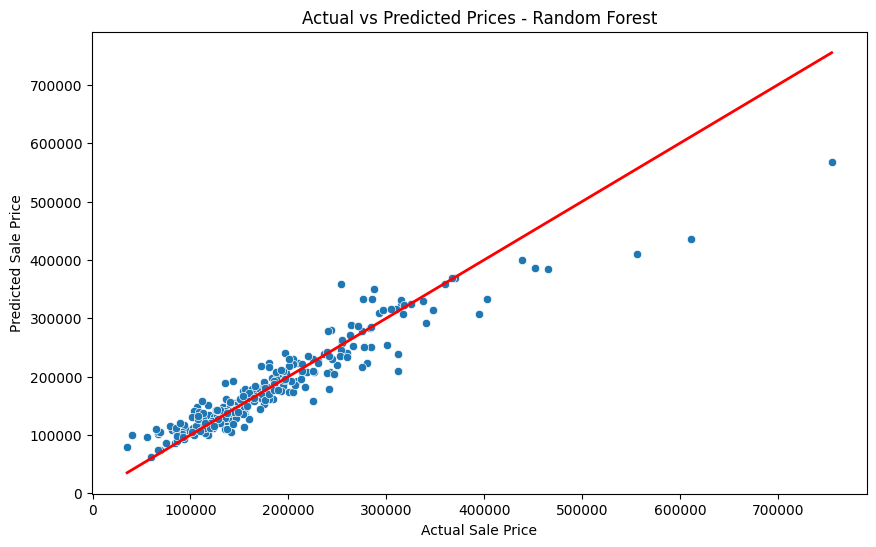

In [75]:
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred)  # Specify x and y as keyword arguments
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2)
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Actual Sale Price')
    plt.ylabel('Predicted Sale Price')
    plt.show()

# Call the function with correct arguments
plot_actual_vs_predicted(y_valid, y_pred_rf, 'Random Forest')



### 7. **Deployment**
Export the final model and outline how to deploy it via a Flask API or any real-time environment.



In [74]:
# Save the Random Forest model
import joblib
joblib.dump(rf_reg, 'random_forest_model.pkl')

['random_forest_model.pkl']

### 8. **Maintenance**
Set up a monitoring system and discuss periodic retraining as part of the ongoing model management.

```markdown
### Maintenance and Retraining
Set up a system for monitoring model performance and automatically retraining the model when new data becomes available. Regularly monitor metrics like RMSE and implement drift detection if performance declines.
```

This detailed Google Colab will cover all the steps of the CRISP-DM process, from Business Understanding to Model Deployment and Maintenance, while explaining both the code and the methodology in a structured, professional manner.